<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** 

Ramos Gutierrez Ana Marcela.

Barragán Vázquez Lizbeth Alejandra.

**Fecha:** 05 de marzo del 2020.

**Expediente** : 714735.
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 6: Clase 10

## Enunciado de tarea 
Resolver los cuestionamientos planteados de la clase 10

### Ejercicio 1: 
> ## <font color ='red'>Tarea
Seguir un procedimiento similar al mostrado cuando se generó una distribución binomial, pero en esta caso genere un código que genere variables aletorias Poisson cuya función de distribución de probabilidad esta dada por:
>$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$
    
> Demuestre matemáticamente que 
> $$P(k+1)=\frac{\lambda}{k+1}P(k)$$
> y a partir de esta relación genere variables aletorias que distribuyen poisson usando el método de la transformada inversa.

Enlace: https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Poisson

### Respuesta

Con lo anterior, sabemos que:

$$P_k=\frac{e^{-\lambda}\cdot (\lambda)^k}{k!}\hspace{1cm} (1)$$

y al obtener $P_{k+1}$ tenemos que:

$$P_{k+1}=\frac{e^{-\lambda}\cdot (\lambda)^{k+1}}{(k+1)!} \hspace{1cm} (2)$$

De este modo, sustituimos las $k$ de la ecuación (1) por $(k+1)$. 

Haciendo que la ecuación (2) quede de forma recursiva, es decir, en términos de $P_k$, tomamos la ecuación (2) y se separan los factoriales de la siguiente forma $(k+1)(k!) = (k+1)!$ y a su vez se separan los exponentes, dando como resultado:

$$P_{k+1} = \frac{e^{-\lambda}\cdot (\lambda)^{k}}{k!} \frac{\lambda}{k+1} $$

Lo anterior se puede simplificar sustituyendo la ecuación (1), de forma que ya la ponemos como recursiva.

$$ P_{k+1} = \frac{\lambda}{k+1} P_{k} $$

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import optimize

In [2]:
def P_acum_Poisson_o(k,l):
    global Pr
    Pr = np.zeros(k)
    Pr[0] = np.exp(-l)
    def pr(i):
        global Pr
        Pr[i+1]=l/(i+1)*Pr[i]
        
    # Llenando el vector Pr usando compresión de listas
    [pr(i) for i in range(k-1)]
    return np.cumsum(Pr)

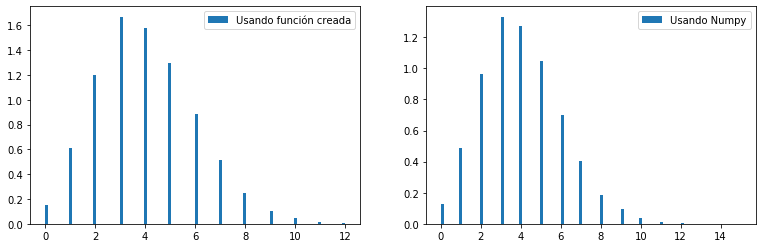

In [3]:
n = 12; l = 4; N = 10**4

p_acum = P_acum_Poisson_o(n,l)
u = np.random.rand(N)

# Gráfica de resultados
plt.figure(figsize=[13,4])
plt.subplot(121)
d_pois = list(map(lambda j:sum(1 for i in p_acum if i<u[j]),range(N)))
plt.hist(d_pois,100,density=True,label='Usando función creada')
plt.legend()

plt.subplot(122)
d_pois_numpy = np.random.poisson(l,N)
plt.hist(d_pois_numpy,100,density=True,label='Usando Numpy')
plt.legend()
np.histogram
plt.show()

### Respuesta planteada en el ejercicio 

La respuesta al ejercicio es la demostración de la distribución de Poisson por medio de factoriales y exponentes, dejando así la ecuación de manera recursiva. 
Posteriormente, en la segunda parte se realiza un código que muestra como resultado el histograma de la distribución mencionada con anterioridad de dos maneras, una de éstas es haciendo uso de una función creada analíticamente y la segunda por numpy.

# Tarea 
Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responda los siguientes literales:
1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.

2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).

3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 

4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. El resultado debe ser como sigue:
![imagen.png](attachment:imagen.png)

5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados. El resultado debe de ser como sigue:
![imagen.png](attachment:imagen.png)

6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir

7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

### Respuesta planteada en el ejercicio 
